exercise for aquisition

In [223]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import statistics
import os
import warnings
warnings.filterwarnings('ignore')

import prepare
import acquire
import env

In [224]:
df_iris = sns.load_dataset("iris")
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [225]:
df_iris.shape

(150, 5)

In [226]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [227]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [228]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [229]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [230]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [231]:
df_google.shape
df_google.columns
df_google.dtypes
df_google.info()
df_google.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [232]:
for col in df_google.columns:
    if df_google[col].dtypes == "object":
        print(f'{col} has {df_google[col].nunique()} unique values')

Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [233]:
df_google.Survived.value_counts(dropna=False)
#0 perished
#1 survived

0    549
1    342
Name: Survived, dtype: int64

In [234]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [235]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [236]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [237]:
df_excel = pd.read_excel("Excel_Exercises.xlsx")
df_excel_sample = df_excel.head(100)

In [238]:
df_excel.shape[0]

7049

In [239]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [240]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes


In [241]:
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [242]:
tstats = df_excel[["monthly_charges","total_charges"]].describe().T
tstats["range"] = (tstats["max"] - tstats["min"])
tstats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [243]:
iris_df = acquire.get_iris_data()
iris_df.rename(columns = {"species_name":"species"},inplace=True)
iris_df.drop(columns=["species_id","measurement_id"],inplace=True)
iris_dummpy_df = pd.get_dummies(iris_df[["species"]],drop_first=False)
iris_mod_df = pd.concat([iris_df,iris_dummpy_df],axis=1)
iris_mod_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [244]:
titanic_df = acquire.get_titanic_data()
titanic_df.drop(columns=["embarked","pclass"],inplace=True) ## due to dupes
titanic_df.drop(columns=["age","deck"],inplace=True) ##due to nulls
titanic_df.rename(columns = {"class":"class_paid"},inplace=True)
dummy_df = pd.get_dummies(titanic_df[["sex","class_paid","embark_town"]],drop_first=False)
titanic_mod_df = pd.concat([titanic_df,dummy_df],axis=1)
titanic_mod_df.head()

,passenger_id,survived,sex,sibsp,parch,fare,class_paid,embark_town,alone,sex_female,sex_male,class_paid_First,class_paid_Second,class_paid_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,male,1,0,7.2500,Third,Southampton,0,0,1,0,0,1,0,0,1
1,1,1,female,1,0,71.2833,First,Cherbourg,0,1,0,1,0,0,1,0,0
2,2,1,female,0,0,7.9250,Third,Southampton,1,1,0,0,0,1,0,0,1
3,3,1,female,1,0,53.1000,First,Southampton,0,1,0,1,0,0,0,0,1
4,4,0,male,0,0,8.0500,Third,Southampton,1,0,1,0,0,1,0,0,1


In [245]:
titanic_df = acquire.get_titanic_data()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [246]:
    telco_churn_df = acquire.get_telco_data()
    telco_churn_df.drop(columns=["contract_type_id","internet_service_type_id","payment_type_id"],inplace=True)
    telco_churn_df["gender_encoded"] = telco_churn_df.gender.map({"Female":1,"Male":0})
    telco_churn_df["partner_encoded"] = telco_churn_df.partner.map({"Yes":1,"No":0})

    telco_churn_df['dependents_encoded'] = telco_churn_df.dependents.map({'Yes': 1, 'No': 0})
    telco_churn_df['phone_service_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    telco_churn_df['paperless_billing_encoded'] = telco_churn_df.paperless_billing.map({'Yes': 1, 'No': 0})
    telco_churn_df['churn_encoded'] = telco_churn_df.churn.map({'Yes': 1, 'No': 0})

    dummy_df = pd.get_dummies(telco_churn_df[[
                            'multiple_lines',
                            'online_security',
                            'online_backup',
                            'device_protection',
                            'tech_support',
                            'streaming_tv',
                            'streaming_movies',
                            'contract_type',
                            'internet_service_type',
                            'payment_type'
                            ]],
                            drop_first=True)
    df = pd.concat([telco_churn_df,dummy_df],axis=1)
    df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [247]:
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   gender                     7043 non-null   object 
 2   senior_citizen             7043 non-null   int64  
 3   partner                    7043 non-null   object 
 4   dependents                 7043 non-null   object 
 5   tenure                     7043 non-null   int64  
 6   phone_service              7043 non-null   object 
 7   multiple_lines             7043 non-null   object 
 8   online_security            7043 non-null   object 
 9   online_backup              7043 non-null   object 
 10  device_protection          7043 non-null   object 
 11  tech_support               7043 non-null   object 
 12  streaming_tv               7043 non-null   object 
 13  streaming_movies           7043 non-null   objec

In [248]:
telco_churn_df = acquire.get_telco_data()
pd.crosstab(telco_churn_df.payment_type,telco_churn_df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [249]:
for col in telco_churn_df.columns:
    print(telco_churn_df[col].value_counts())
    print()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
25     79
26     79
14 

In [250]:
iris_mod2_df = acquire.get_iris_data()
iris_mod2_df.rename(columns = {"species_name":"species"},inplace=True)
iris_mod2_df.drop(columns=["species_id","measurement_id"],inplace=True)
iris_mod2_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [251]:
prepare.split_function(iris_mod2_df,"species")

prepared df shape: (150, 5)
train shape: (90, 5)
validate shape: (30, 5)
test shape: (30, 5)


(     sepal_length  sepal_width  petal_length  petal_width     species
 70            5.9          3.2           4.8          1.8  versicolor
 123           6.3          2.7           4.9          1.8   virginica
 87            6.3          2.3           4.4          1.3  versicolor
 3             4.6          3.1           1.5          0.2      setosa
 15            5.7          4.4           1.5          0.4      setosa
 53            5.5          2.3           4.0          1.3  versicolor
 20            5.4          3.4           1.7          0.2      setosa
 50            7.0          3.2           4.7          1.4  versicolor
 54            6.5          2.8           4.6          1.5  versicolor
 52            6.9          3.1           4.9          1.5  versicolor
 81            5.5          2.4           3.7          1.0  versicolor
 88            5.6          3.0           4.1          1.3  versicolor
 145           6.7          3.0           5.2          2.3   virginica
 130  

In [252]:
train_iris,test_iris,validate_iris = prepare.split_function(iris_mod_df,"species")

prepared df shape: (150, 8)
train shape: (90, 8)
validate shape: (30, 8)
test shape: (30, 8)


In [253]:
train_titanic,test_titanic,validate_titanic = prepare.split_function(titanic_mod_df,"survived")

prepared df shape: (891, 17)
train shape: (534, 17)
validate shape: (178, 17)
test shape: (179, 17)


In [254]:
telco_churn_mod_df = prepare.prep_telco()
train_telco,test_telco,validate_telco = prepare.split_function(telco_churn_mod_df,"churn")


prepared df shape: (7043, 48)
train shape: (4225, 48)
validate shape: (1409, 48)
test shape: (1409, 48)


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

Tidy data - correct place and right build

wide data --> long data (melt) df.melt() gets values out of columns
long data --> wide data (pivot_table, unstack)

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:


name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

In [255]:
sql_query = """
                SELECT * 
                FROM attendance
                ;
                """
attendance_df = pd.read_sql(sql_query,env.get_db_url("tidy_data"))
attendance_df ## P-present, A-absent, T-tardy, H-half day

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [256]:
attn_df = attendance_df.replace({"P":1,"T":.9,"A":0,"H":.5})

attn_df = attn_df.melt(id_vars="Unnamed: 0",var_name="Date",value_name="Atten_value")

attn_df.groupby(["Unnamed: 0"]).mean()

,Atten_value
Unnamed: 0,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


Coffee Levels

Read the coffee_levels table.
Transform the data so that each carafe is in it's own column.
Is this the best shape for the data?

In [257]:
sql_query = """
                SELECT * 
                FROM coffee_levels
                ;
                """
coffee_levels_df = pd.read_sql(sql_query,env.get_db_url("tidy_data"))
coffee_levels_df ## three carafe options, dispensed at different times and different amounts?

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [258]:
coffee_tidy = coffee_levels_df.pivot_table(index = ['hour'],
                                       columns= 'coffee_carafe', 
                                       values = 'coffee_amount').reset_index()
coffee_tidy ## defintely seems like a better way to look at it

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


Cake Recipes

 Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

 Tidy the data as necessary.
 
 Which recipe, on average, is the best? recipe b

 Which oven temperature, on average, produces the best results? 275

 Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [259]:
sql_query = """
                SELECT * 
                FROM cake_recipes
                ;
                """
cake_recipes_df = pd.read_sql(sql_query,env.get_db_url("tidy_data"))
cake_recipes_df ## values are tastiness scores

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [260]:
cake_recipes_df[['recipe', 'position']] = cake_recipes_df["recipe:position"].str.split(':', expand = True)
cake_df = cake_recipes_df.drop(columns={"recipe:position"})
cake_df = cake_df.melt(id_vars = ['recipe',"position"],var_name="temp",value_name="taste_score")
print("best recipe", cake_df.groupby("recipe").mean().idxmax())
print("best temp", cake_df.groupby("temp").mean().idxmax())
print("best combination", cake_df.groupby(["recipe","position","temp"]).mean().idxmax())
cake_df.head()

best recipe taste_score    b
dtype: object
best temp taste_score    275
dtype: object
best combination taste_score    (b, bottom, 300)
dtype: object


,recipe,position,temp,taste_score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def chi_cheat(series1,series2,alpha):
    ''' 
    input (series1, series2, alpha)
    outputs chi observed, expected, hypothesis pass/fail based on alpha, and a dataframe
    '''

    alpha = .05

    df1 = pd.crosstab(series1,series2)
    print(df1)
    chi2, p, degf, expected = stats.chi2_contingency(df1)

    H0 = (f"{df1.index.name} is independant of being {df1.columns.name}")
    H1 = (f"{df1.index.name} is not independant of being {df1.columns.name}")

    print('Observed')
    print(df1.values)
    print('---\nExpected')
    print(expected)
    print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
    if p>alpha:
        print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
    else:
        print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n({H0})")
    return df1

def two_cat_bar_chi_cheat(var_x,var_y,df,threshold_line,alpha):
    ''' 
    takes in two cat cars, df, threshould_line, and alpha
    returns a bar plot and chi
    '''

    alpha = .05
    df1 = pd.crosstab(var_x,var_y)

    H0 = (f"{var_x.name} is independant of being {var_y.name}")
    H1 = (f"{var_x.name} is not independant of being {var_y.name}")

    chi2, p, degf, expected = stats.chi2_contingency(df1)

    if p>alpha:
        print(f"{chi2}=chi2 | due to p={p:.5f} > α={alpha} we fail to reject ({H0})")
    else:
        print(f"{chi2}=chi2 | due to p = {p:.5f} < α = {alpha} we reject ({H0})")
    

    plt.title(f"{var_y.name} relation {var_x.name}")
    sns.barplot(x=var_x, y=var_y, data=df)
    plt.axhline(threshold_line, label="Threshold line")
    plt.show()
    return chi2,p,var_x.name

def three_cat_bar_cheat(var_x,var_y,var_hue,df,threshold_line):
    ''' 
    takes in three variables and a df
    returns a bar plot
    '''

    plt.title(f"{var_hue.name} dependancy of {var_y.name} at all {var_x.name}")
    sns.barplot(x=var_x, y=var_y, hue=var_hue, data=df)
    plt.axhline(threshold_line, label="Threshold line")
    plt.show()


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [262]:
#df = acquire.get_titanic_data()
df = prepare.prep_titanic()
df.drop(columns=["sex_male","embark_town_Queenstown","embark_town_Southampton"],inplace=True)
train_df,validate_df,test_df = prepare.split_function(df,"survived")
train_df

prepared df shape: (891, 9)
train shape: (534, 9)
validate shape: (178, 9)
test shape: (179, 9)


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
455,455,1,3,male,0,0,7.8958,Cherbourg,1
380,380,1,1,female,0,0,227.5250,Cherbourg,1
492,492,0,1,male,0,0,30.5000,Southampton,1
55,55,1,1,male,0,0,35.5000,Southampton,1
243,243,0,3,male,0,0,7.1250,Southampton,1
...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,Southampton,1
128,128,1,3,female,1,1,22.3583,Cherbourg,0
636,636,0,3,male,0,0,7.9250,Southampton,1
222,222,0,3,male,0,0,8.0500,Southampton,1


In [263]:
num_vars = list(train_df.select_dtypes(include = ["float64"]).columns)
cat_vars = list(train_df.select_dtypes(include = ["int64","object","uint8"]).columns)
print(num_vars,cat_vars)

['fare'] ['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'embark_town', 'alone']


In [264]:
train_df.info()
train_df.describe(include="all")
#train_df[col].value_counts((normalize = True)*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  534 non-null    int64  
 1   survived      534 non-null    int64  
 2   pclass        534 non-null    int64  
 3   sex           534 non-null    object 
 4   sibsp         534 non-null    int64  
 5   parch         534 non-null    int64  
 6   fare          534 non-null    float64
 7   embark_town   533 non-null    object 
 8   alone         534 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 41.7+ KB


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
count,534.000000,534.000000,534.000000,534,534.000000,534.000000,534.000000,533,534.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,Southampton,NaN
freq,NaN,NaN,NaN,348,NaN,NaN,NaN,380,NaN
mean,446.677903,0.383895,2.323970,NaN,0.514981,0.352060,31.058106,NaN,0.627341
std,257.471048,0.486789,0.822928,NaN,1.143856,0.759941,46.866121,NaN,0.483966
min,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,219.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.895800,NaN,0.000000
50%,452.500000,0.000000,3.000000,NaN,0.000000,0.000000,13.500000,NaN,1.000000
75%,672.750000,1.000000,3.000000,NaN,1.000000,0.000000,30.053100,NaN,1.000000


passenger_id
455    1
868    1
596    1
97     1
879    1
      ..
689    1
867    1
700    1
173    1
496    1
Name: passenger_id, Length: 534, dtype: int64
455    0.187266
868    0.187266
596    0.187266
97     0.187266
879    0.187266
         ...   
689    0.187266
867    0.187266
700    0.187266
173    0.187266
496    0.187266
Name: passenger_id, Length: 534, dtype: float64


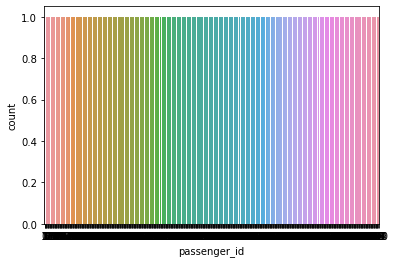

survived
0    329
1    205
Name: survived, dtype: int64
0    61.610487
1    38.389513
Name: survived, dtype: float64


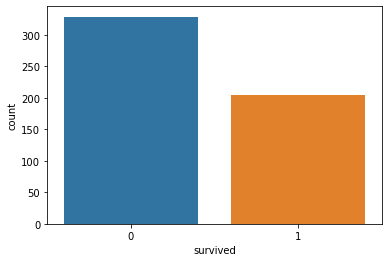

pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


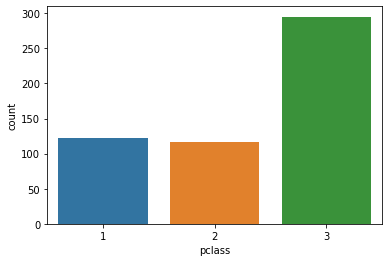

sex
male      348
female    186
Name: sex, dtype: int64
male      65.168539
female    34.831461
Name: sex, dtype: float64


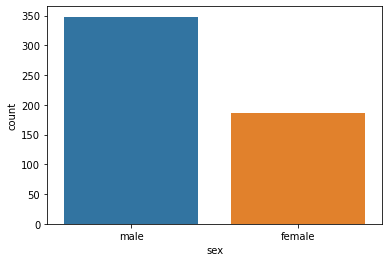

sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


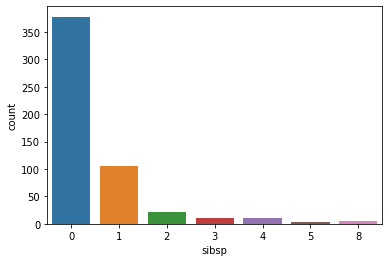

parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


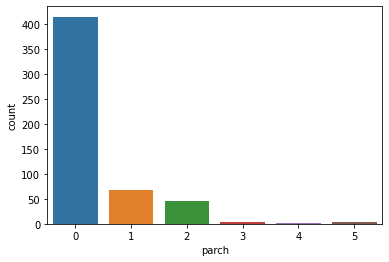

embark_town
Southampton    380
Cherbourg      107
Queenstown      46
Name: embark_town, dtype: int64
Southampton    71.294559
Cherbourg      20.075047
Queenstown      8.630394
Name: embark_town, dtype: float64


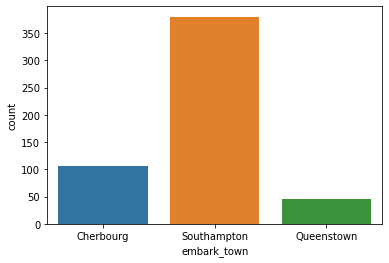

alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


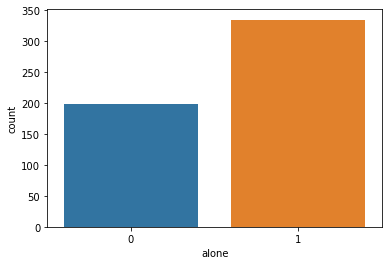

In [265]:
for col in cat_vars:
    print (col)
    print(train_df[col].value_counts())
    print(train_df[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_df)
    plt.show()

534.0=chi2 | due to p=0.47965 > α=0.05 we fail to reject (passenger_id is independant of being survived)


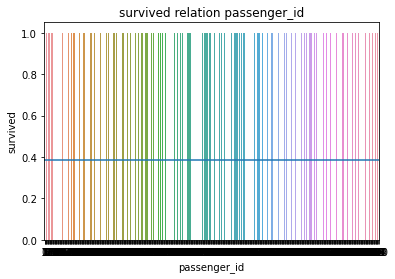

59.14042233196479=chi2 | due to p = 0.00000 < α = 0.05 we reject (pclass is independant of being survived)


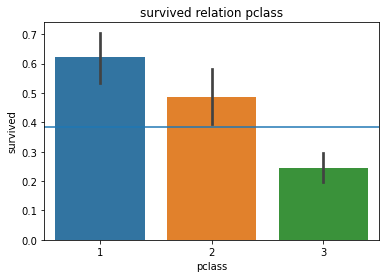

161.74047780950505=chi2 | due to p = 0.00000 < α = 0.05 we reject (sex is independant of being survived)


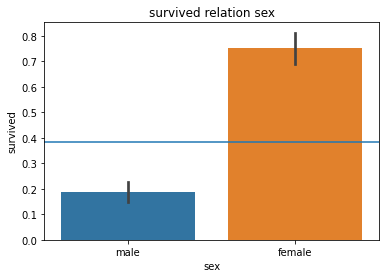

28.17200563475333=chi2 | due to p = 0.00009 < α = 0.05 we reject (sibsp is independant of being survived)


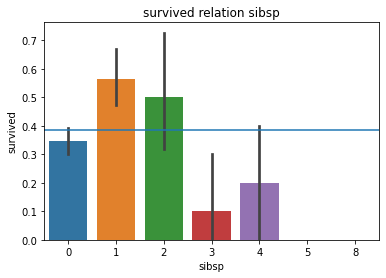

16.24236233537371=chi2 | due to p = 0.00619 < α = 0.05 we reject (parch is independant of being survived)


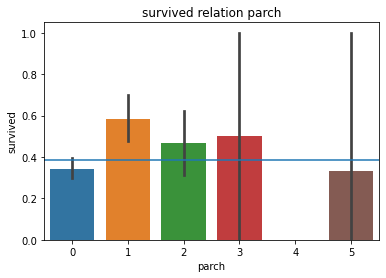

15.456474286245333=chi2 | due to p = 0.00044 < α = 0.05 we reject (embark_town is independant of being survived)


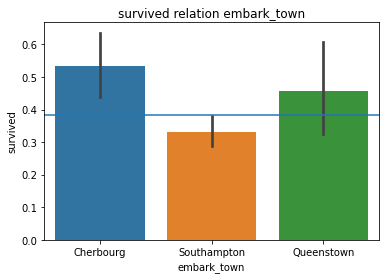

21.34479778126115=chi2 | due to p = 0.00000 < α = 0.05 we reject (alone is independant of being survived)


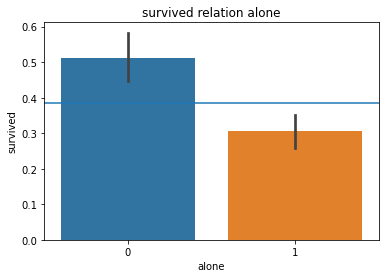

In [266]:
for iter1 in cat_vars:
    if iter1 != "survived":
        two_cat_bar_chi_cheat(train_df[iter1],train_df.survived,train_df,train_df.survived.mean(),.05)


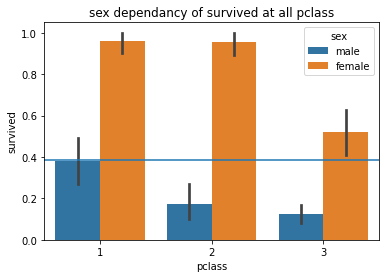

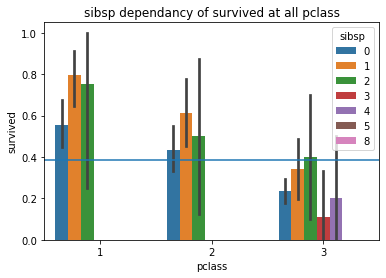

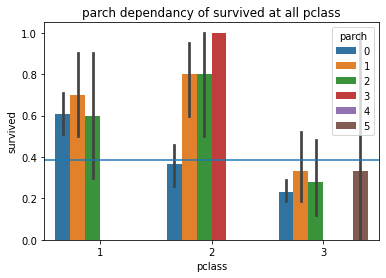

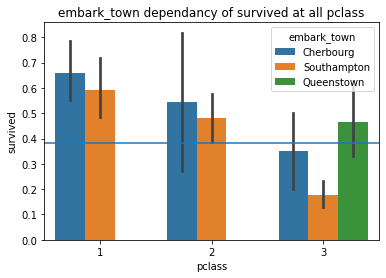

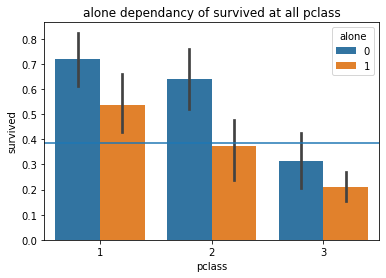

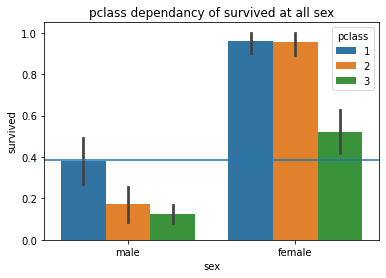

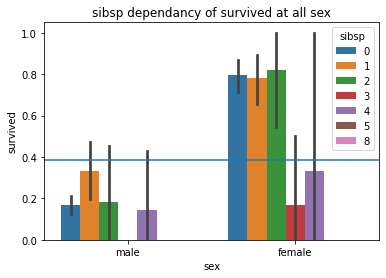

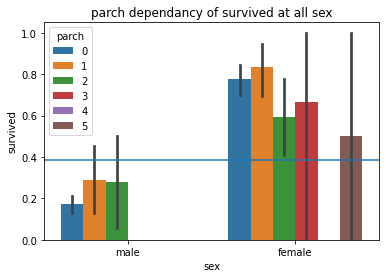

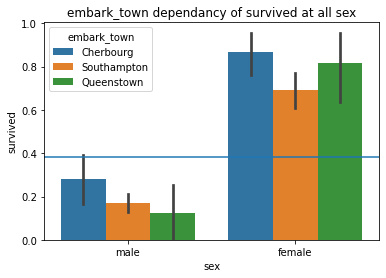

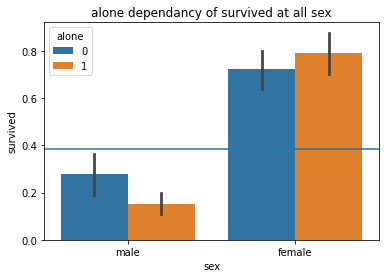

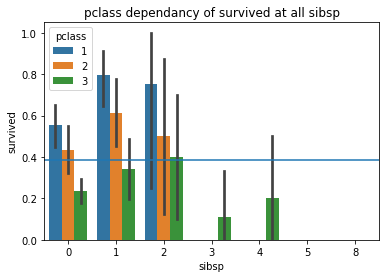

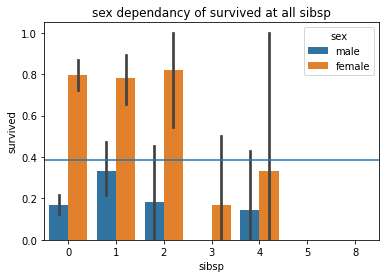

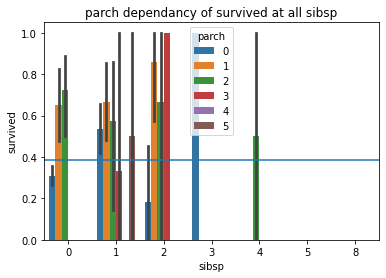

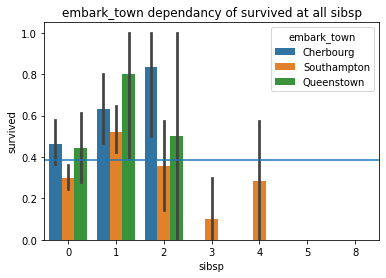

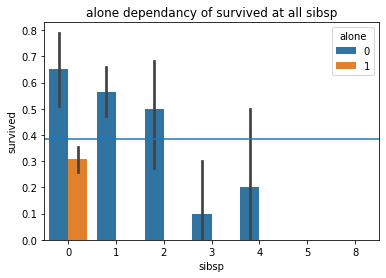

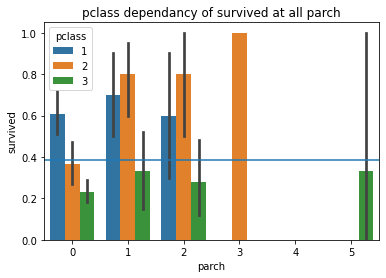

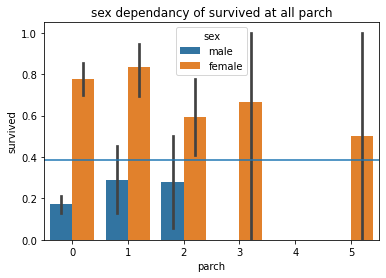

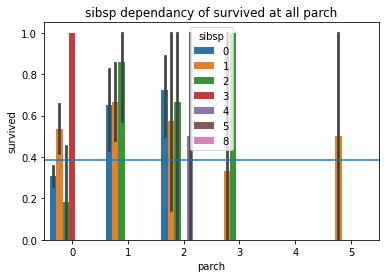

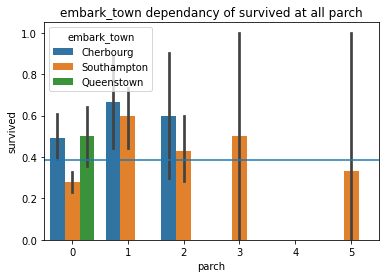

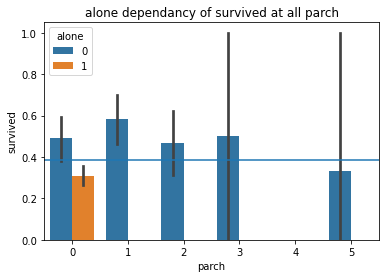

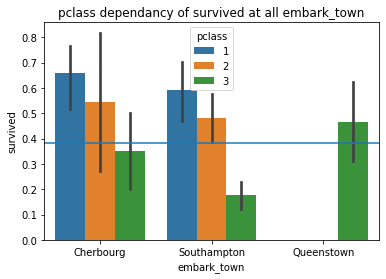

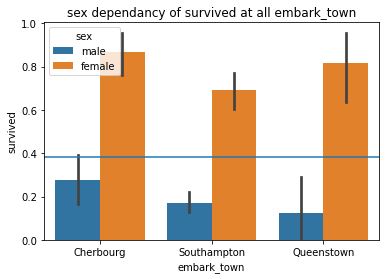

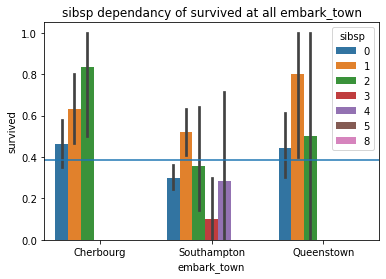

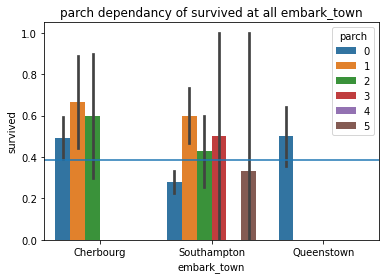

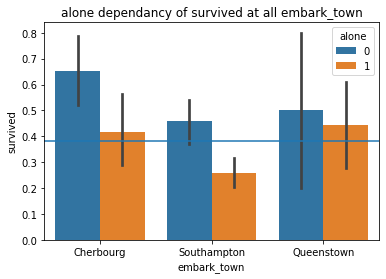

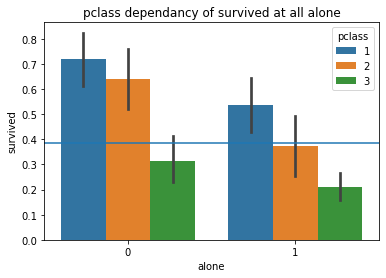

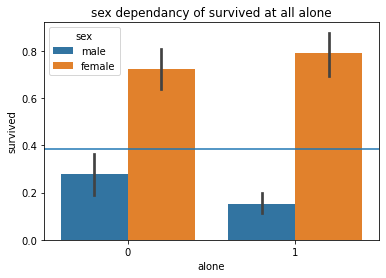

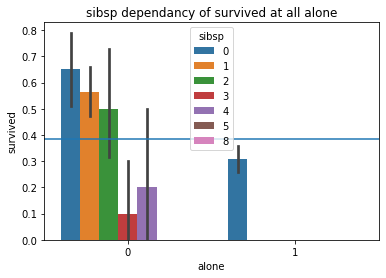

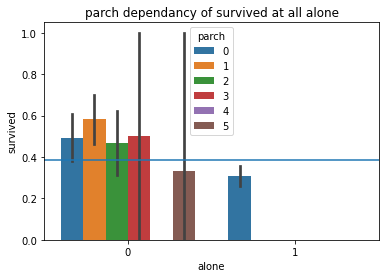

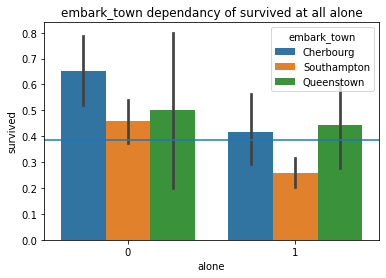

In [267]:
#three_cat_bar_cheat(train_df.pclass,train_df.survived,train_df.sex,train_df,train_df.survived.mean())
for iter1 in cat_vars:
    for iter2 in cat_vars:
        if iter1 != iter2 and \
        iter1 != "passenger_id" and \
        iter2 != "passenger_id" and \
        iter1 != "survived" and \
        iter2 != "survived" \
        :
            
            three_cat_bar_cheat(train_df[iter1],train_df.survived,train_df[iter2],train_df,train_df.survived.mean())



Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [268]:
iris_df = prepare.prep_iris()
train_df,validate_df,test_df = prepare.split_function(iris_df,"species")
train_df.head()

prepared df shape: (150, 5)
train shape: (90, 5)
validate shape: (30, 5)
test shape: (30, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
123,6.3,2.7,4.9,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
3,4.6,3.1,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [269]:
num_vars = list(train_df.select_dtypes(include = ["float64"]).columns)
cat_vars = list(train_df.select_dtypes(include = ["int64","object","uint8"]).columns)
print(num_vars,cat_vars)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] ['species']


sepal_length
species     sepal_length
setosa      5.0             23.333333
            5.4             13.333333
            4.8             10.000000
            5.1             10.000000
            4.6              6.666667
            4.9              6.666667
            5.7              6.666667
            4.4              3.333333
            4.5              3.333333
            4.7              3.333333
            5.2              3.333333
            5.3              3.333333
            5.5              3.333333
            5.8              3.333333
versicolor  5.7             13.333333
            5.5             10.000000
            5.6             10.000000
            5.8             10.000000
            5.9              6.666667
            6.0              6.666667
            6.1              6.666667
            6.4              6.666667
            4.9              3.333333
            5.2              3.333333
            5.4              3.333333
            

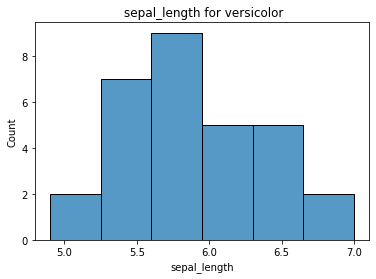

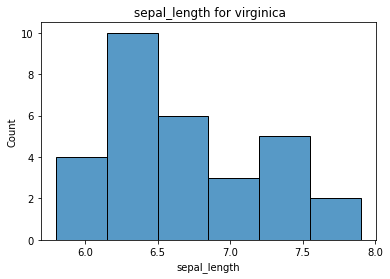

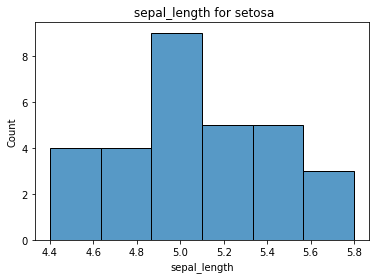

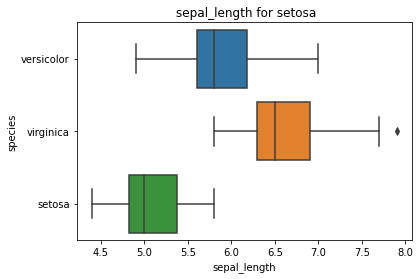

sepal_width
species     sepal_width
setosa      3.4            23.333333
            3.0            10.000000
            3.5            10.000000
            3.8            10.000000
            3.1             6.666667
            3.2             6.666667
            3.9             6.666667
            2.3             3.333333
            2.9             3.333333
            3.3             3.333333
            3.6             3.333333
            3.7             3.333333
            4.0             3.333333
            4.1             3.333333
            4.4             3.333333
versicolor  2.7            16.666667
            3.0            16.666667
            2.9            13.333333
            2.8            10.000000
            3.2            10.000000
            2.3             6.666667
            2.4             6.666667
            2.5             6.666667
            2.6             6.666667
            3.1             3.333333
            3.4             3.333333
vi

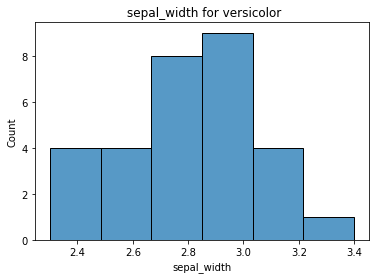

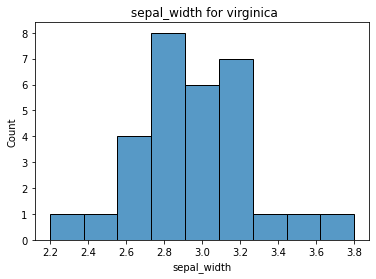

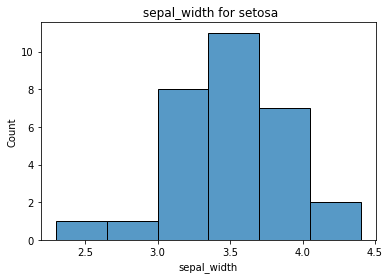

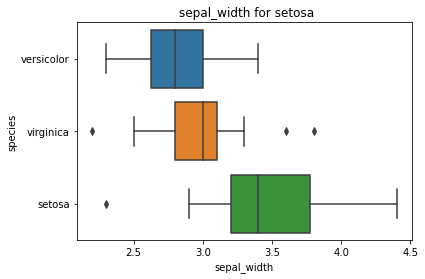

petal_length
species     petal_length
setosa      1.5             23.333333
            1.6             20.000000
            1.4             16.666667
            1.3             13.333333
            1.7             13.333333
            1.2              6.666667
            1.9              6.666667
versicolor  4.2             13.333333
            4.5             13.333333
            3.9             10.000000
            4.0             10.000000
            4.6             10.000000
            4.1              6.666667
            4.3              6.666667
            4.7              6.666667
            3.3              3.333333
            3.5              3.333333
            3.7              3.333333
            4.4              3.333333
            4.8              3.333333
            4.9              3.333333
            5.1              3.333333
virginica   5.1             16.666667
            5.6             13.333333
            5.8             10.000000
            

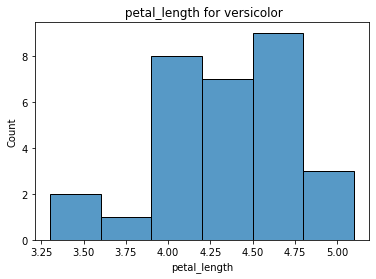

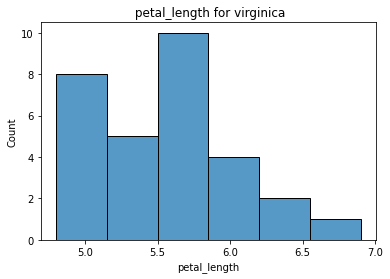

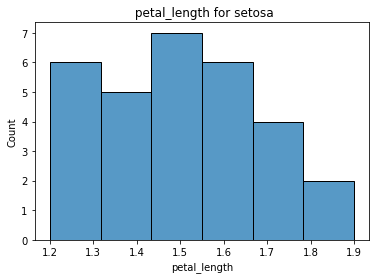

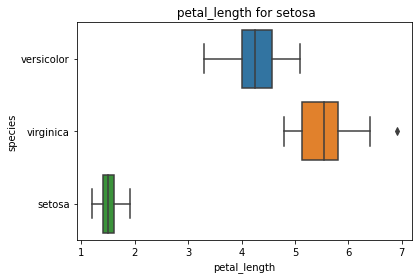

petal_width
species     petal_width
setosa      0.2            50.000000
            0.4            20.000000
            0.3            13.333333
            0.1            10.000000
            0.5             3.333333
            0.6             3.333333
versicolor  1.3            33.333333
            1.5            16.666667
            1.0            13.333333
            1.2            13.333333
            1.4            10.000000
            1.6             6.666667
            1.1             3.333333
            1.8             3.333333
virginica   1.8            26.666667
            2.3            16.666667
            1.9            10.000000
            2.1            10.000000
            1.5             6.666667
            2.0             6.666667
            2.2             6.666667
            2.4             6.666667
            2.5             6.666667
            1.6             3.333333
Name: petal_width, dtype: float64


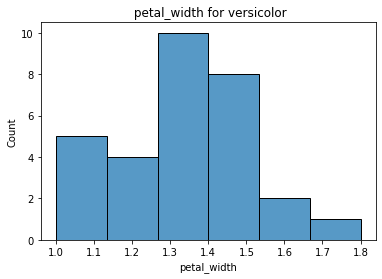

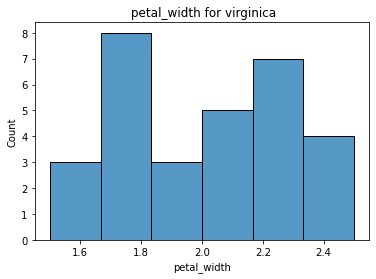

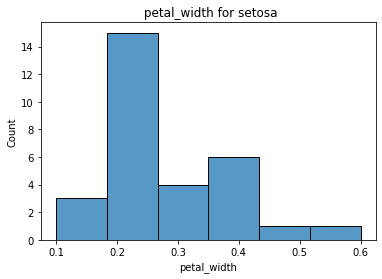

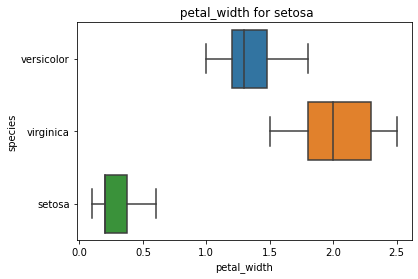

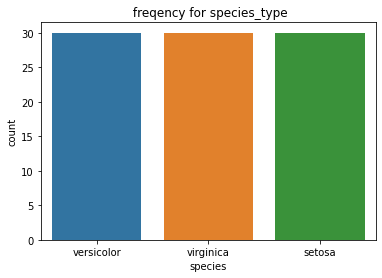

In [270]:
for col in num_vars:
    print (col)
    #print(train_df.groupby("species")[col].value_counts())
    print(train_df.groupby("species")[col].value_counts(normalize=True)*100)
    for species_type in train_df.species.unique():

        sns.histplot(x=train_df[col][train_df.species == species_type], data=train_df)
        plt.title(f" {train_df[col].name} for {species_type}")
        plt.show()
    sns.boxplot(x=train_df[col], y=train_df.species , data=train_df)
    plt.title(f" {train_df[col].name} for {species_type}")
    plt.show()

sns.countplot(x=train_df.species, data=train_df)
plt.title(f" freqency for species_type")
plt.show()

petal_width is pretty indicitative of which species, this in combination of petal_length would be a good predictor of species. could use sepal_length as an additonal verification metric. sepal width has a lot of overlap and does not seem to be as useful by itself

petal_width
species     sepal_length
setosa      5.0             23.333333
            5.4             13.333333
            4.8             10.000000
            5.1             10.000000
            4.6              6.666667
            4.9              6.666667
            5.7              6.666667
            4.4              3.333333
            4.5              3.333333
            4.7              3.333333
            5.2              3.333333
            5.3              3.333333
            5.5              3.333333
            5.8              3.333333
versicolor  5.7             13.333333
            5.5             10.000000
            5.6             10.000000
            5.8             10.000000
            5.9              6.666667
            6.0              6.666667
            6.1              6.666667
            6.4              6.666667
            4.9              3.333333
            5.2              3.333333
            5.4              3.333333
            6

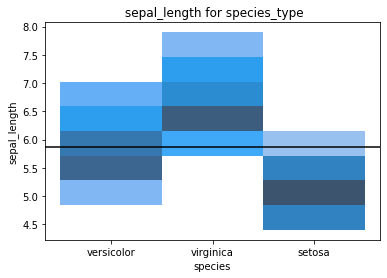

species     sepal_width
setosa      3.4            23.333333
            3.0            10.000000
            3.5            10.000000
            3.8            10.000000
            3.1             6.666667
            3.2             6.666667
            3.9             6.666667
            2.3             3.333333
            2.9             3.333333
            3.3             3.333333
            3.6             3.333333
            3.7             3.333333
            4.0             3.333333
            4.1             3.333333
            4.4             3.333333
versicolor  2.7            16.666667
            3.0            16.666667
            2.9            13.333333
            2.8            10.000000
            3.2            10.000000
            2.3             6.666667
            2.4             6.666667
            2.5             6.666667
            2.6             6.666667
            3.1             3.333333
            3.4             3.333333
virginica   2.

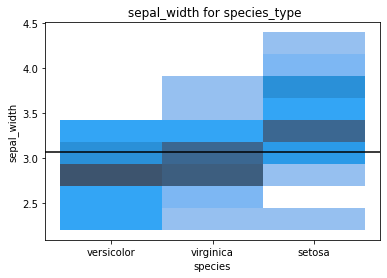

species     petal_length
setosa      1.5             23.333333
            1.6             20.000000
            1.4             16.666667
            1.3             13.333333
            1.7             13.333333
            1.2              6.666667
            1.9              6.666667
versicolor  4.2             13.333333
            4.5             13.333333
            3.9             10.000000
            4.0             10.000000
            4.6             10.000000
            4.1              6.666667
            4.3              6.666667
            4.7              6.666667
            3.3              3.333333
            3.5              3.333333
            3.7              3.333333
            4.4              3.333333
            4.8              3.333333
            4.9              3.333333
            5.1              3.333333
virginica   5.1             16.666667
            5.6             13.333333
            5.8             10.000000
            5.2          

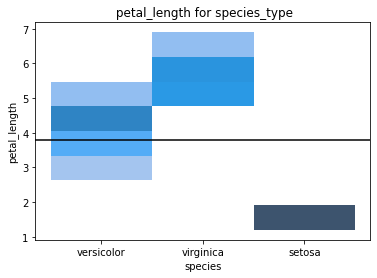

species     petal_width
setosa      0.2            50.000000
            0.4            20.000000
            0.3            13.333333
            0.1            10.000000
            0.5             3.333333
            0.6             3.333333
versicolor  1.3            33.333333
            1.5            16.666667
            1.0            13.333333
            1.2            13.333333
            1.4            10.000000
            1.6             6.666667
            1.1             3.333333
            1.8             3.333333
virginica   1.8            26.666667
            2.3            16.666667
            1.9            10.000000
            2.1            10.000000
            1.5             6.666667
            2.0             6.666667
            2.2             6.666667
            2.4             6.666667
            2.5             6.666667
            1.6             3.333333
Name: petal_width, dtype: float64


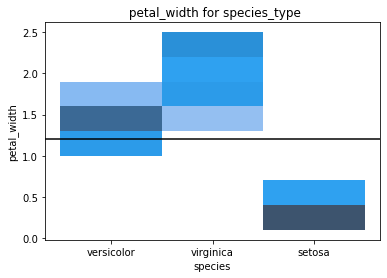

In [271]:

print (col)
#print(train_df.groupby("species")[col].value_counts())
for col in num_vars:

    print(train_df.groupby("species")[col].value_counts(normalize=True)*100)
    sns.histplot(y=train_df[col],x=train_df.species, data=train_df)
    plt.title(f" {train_df[col].name} for species_type")

    plt.axhline(train_df[col].mean(), label="Mean line",color="black")
    plt.show()


In [272]:
#print(train_df.groupby("species")[col].value_counts())
for col in num_vars:
    #print(train_df[col].name)
    H0 = (f"viriginica are of equal measures for {train_df[col].name} compared to  versicolor")
    H1 = (f"viriginica are of inequal measures for {train_df[col].name} compared to  versicolor")

    t,p = stats.mannwhitneyu(x=train_df[col][train_df.species=="virginica"],
                            y=train_df[col][train_df.species=="versicolor"])

    if p>.05:
        print(f"due to p={p:.5f} > α = .05 we fail to reject ({H0})")
    else:
        print(f"due to p = {p:.5f} < α = .05 we reject ({H0})")

due to p = 0.00000 < α = .05 we reject (viriginica are of equal measures for sepal_length compared to  versicolor)
due to p=0.06371 > α = .05 we fail to reject (viriginica are of equal measures for sepal_width compared to  versicolor)
due to p = 0.00000 < α = .05 we reject (viriginica are of equal measures for petal_length compared to  versicolor)
due to p = 0.00000 < α = .05 we reject (viriginica are of equal measures for petal_width compared to  versicolor)


again sepal_width does not seem to help in being a disguishable feature

Text(0.5, 1.0, 'pairplot by species')

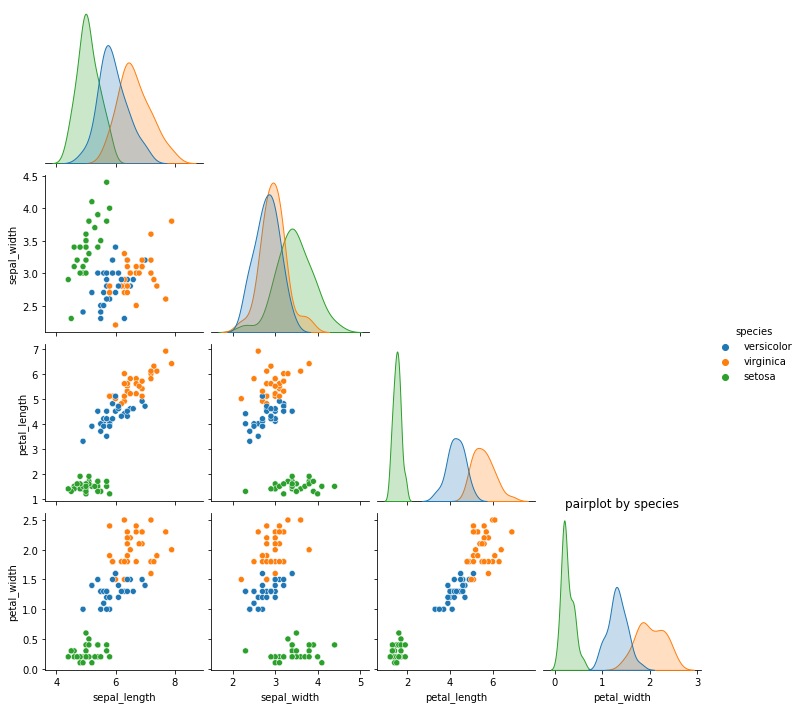

In [273]:
sns.pairplot(data=train_df,hue="species",corner=True)
plt.title("pairplot by species")


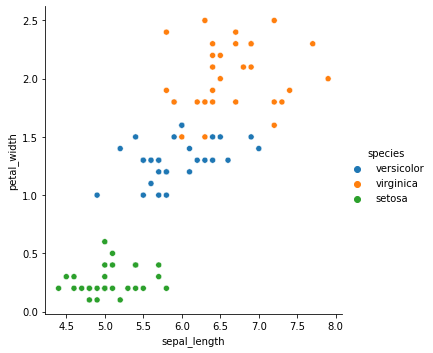

In [274]:
sns.relplot(x=train_df.sepal_length,y=train_df.petal_width,hue=train_df.species, data=train_df)


<AxesSubplot:xlabel='measurement', ylabel='length'>

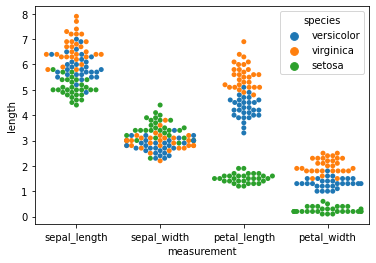

In [275]:
df = train_df.melt(id_vars="species",var_name="measurement",value_name="length")
sns.swarmplot(x=df.measurement,y=df.length,hue=df.species)

In [276]:

H0 = (f"viriginica are of equal measures for sepal area compared to  versicolor")
H1 = (f"viriginica are of inequal measures for sepal area compared to  versicolor")
t,p = stats.mannwhitneyu(x=train_df["sepal_length"][train_df.species=="virginica"] * \
                        train_df["sepal_width"][train_df.species=="virginica"],
                        y=train_df["sepal_length"][train_df.species=="versicolor"] * \
                        train_df["sepal_width"][train_df.species=="versicolor"]    )
if p>.05:
    print(f"due to p={p:.5f} > α = .05 we fail to reject ({H0})")
else:
    print(f"due to p = {p:.5f} < α = .05 we reject ({H0})")

due to p = 0.00021 < α = .05 we reject (viriginica are of equal measures for sepal area compared to  versicolor)


setosa can be validated easily with petal leng and petal width, the otheres will need a combination

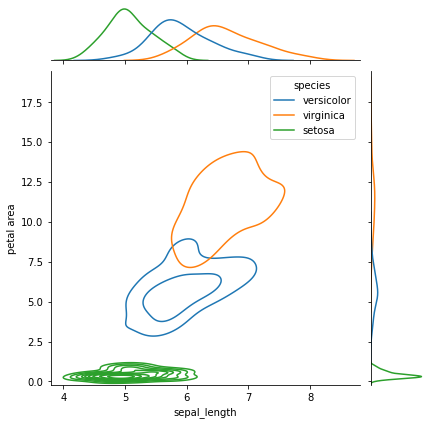

In [277]:
train_df["petal area"] = train_df.petal_length * train_df.petal_width
sns.jointplot(
    data=train_df,
    y="petal area",
    x="sepal_length",
    hue="species",
    kind = "kde"
)

takeaway - the created feature resulted as a product of two variables helped to seperate out the likely of falling within one of the species category with less information being required

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [278]:
telco_df = prepare.prep_telco()
telco_df.total_charges.replace({" ":0},inplace=True)
telco_df.total_charges = telco_df.total_charges.astype("float")
telco_df.total_charges.value_counts()

train_df,validate_df,test_df = prepare.split_function(telco_df,"churn")
train_df.info()


prepared df shape: (7043, 48)
train shape: (4225, 48)
validate shape: (1409, 48)
test shape: (1409, 48)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   object 
 4   dependents                             4225 non-null   object 
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   object 
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                    

In [279]:
num_vars = list(train_df.select_dtypes(include = ["float64"]).columns)
cat_vars = list(train_df.select_dtypes(include = ["object","uint8"]).columns)

for col in train_df:
    if train_df[col].dtype == "int64" and train_df[col].nunique() > 10:
        num_vars.append(train_df[col].name)
    else:
        cat_vars.append(train_df[col].name)

print(num_vars,cat_vars)

['monthly_charges', 'total_charges', 'tenure'] ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'multiple_lines_No phone service', 'multiple_lines_Yes', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check', 'customer_id', 'gender', 'seni

monthly_charges
churn  monthly_charges
No     20.05              1.063144
       19.85              0.966495
       19.65              0.902062
       19.90              0.902062
       20.00              0.869845
                            ...   
Yes    114.50             0.089206
       115.65             0.089206
       116.20             0.089206
       117.45             0.089206
       118.35             0.089206
Name: monthly_charges, Length: 1910, dtype: float64


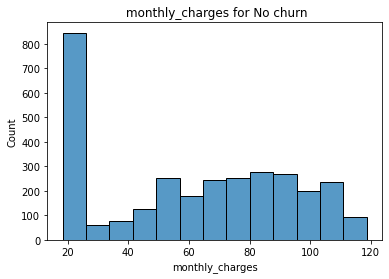

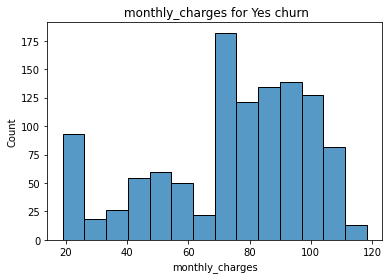

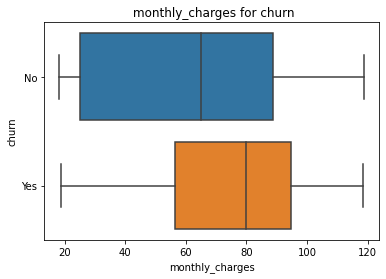

total_charges
churn  total_charges
No     0.00             0.289948
       19.65            0.128866
       19.75            0.128866
       20.05            0.128866
       19.20            0.096649
                          ...   
Yes    7723.90          0.089206
       7752.30          0.089206
       7804.15          0.089206
       7856.00          0.089206
       7968.85          0.089206
Name: total_charges, Length: 4090, dtype: float64


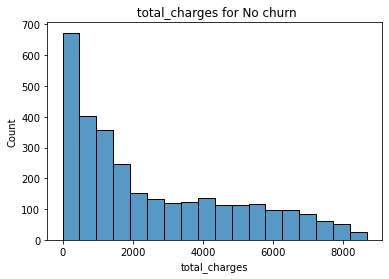

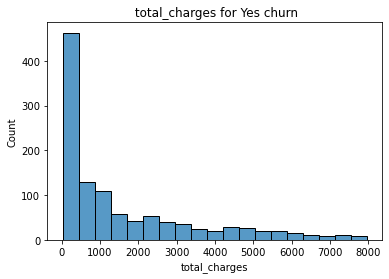

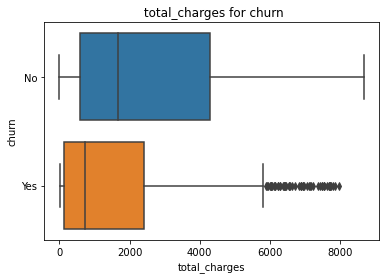

tenure
churn  tenure
No     72         6.894330
       1          4.188144
       71         3.253866
       70         2.158505
       2          2.029639
       3          1.965206
       4          1.836340
       68         1.739691
       7          1.707474
       69         1.707474
       11         1.610825
       12         1.578608
       52         1.578608
       66         1.546392
       67         1.546392
       6          1.514175
       13         1.481959
       18         1.481959
       8          1.449742
       9          1.449742
       15         1.449742
       24         1.385309
       61         1.385309
       65         1.385309
       46         1.353093
       60         1.353093
       64         1.353093
       63         1.320876
       35         1.288660
       62         1.288660
       10         1.256443
       23         1.256443
       51         1.256443
       17         1.224227
       20         1.224227
       22         1.224227
       

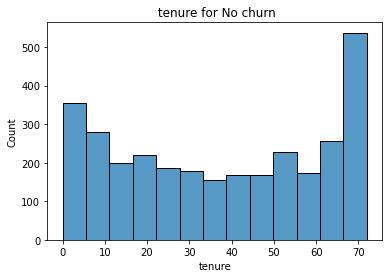

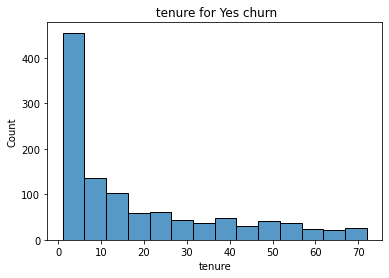

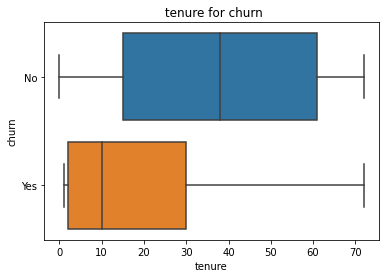

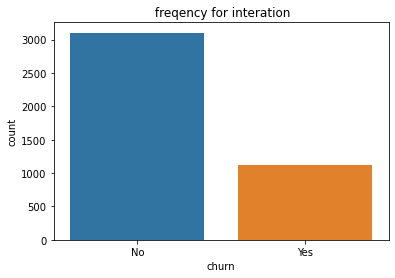

In [280]:
for col in num_vars:
    print (col)
    #print(train_df.groupby("churn")[col].value_counts())
    print(train_df.groupby("churn")[col].value_counts(normalize=True)*100)
    for interation in train_df.churn.unique():

        sns.histplot(x=train_df[col][train_df.churn == interation], data=train_df)
        plt.title(f" {train_df[col].name} for {interation} churn")
        plt.show()
    sns.boxplot(x=train_df[col], y=train_df.churn , data=train_df)
    plt.title(f" {train_df[col].name} for churn")
    plt.show()

sns.countplot(x=train_df.churn, data=train_df)
plt.title(f" freqency for interation")
plt.show()

In [282]:
train_df.churn = train_df.churn.map({"Yes":1,"No":0})
train_df.churn.value_counts()


0    3104
1    1121
Name: churn, dtype: int64

In [283]:
cat_df = pd.DataFrame({"col_name":[],"p_val":[],"chi2_val":[]})
for iter1 in cat_vars:
    #if iter1 != "churn":
        
    var_x = train_df[iter1]
    var_y = train_df.churn
    data = train_df
    #threshold_line = train_df.churn.mean()
        
    alpha = .05
    df1 = pd.crosstab(var_x,var_y)
    H0 = (f"{var_x.name} is independant of being {var_y.name}")
    H1 = (f"{var_x.name} is not independant of being {var_y.name}")
    chi2, p, degf, expected = stats.chi2_contingency(df1)
    #if p>alpha:
        #print(f"{chi2}=chi2 | due to p={p:.5f} > α={alpha} we fail to reject ({H0})")
    #else:
        #print(f"{chi2}=chi2 | due to p = {p:.5f} < α = {alpha} we reject ({H0})")
    
    #plt.title(f"{var_y.name} relation {var_x.name}")
    #sns.barplot(x=var_x, y=var_y, data=df)
    #plt.axhline(threshold_line, label="Threshold line")
    #plt.show()
    
    cat_df.loc[len(cat_df.index)] = [var_x.name,p,chi2]

In [284]:
cat_dep_df = cat_df[cat_df["p_val"] < .05]
cat_dep_df.chi2_val.describe()

count      74.000000
mean      389.740794
std       825.520296
min         6.096576
25%       100.330977
50%       206.485566
75%       362.487462
max      4219.871454
Name: chi2_val, dtype: float64

In [285]:
cat_dep_df["chi_cat"] = \
    np.where(cat_dep_df.chi2_val < cat_dep_df.chi2_val.quantile(.25),"very low",
    np.where(cat_dep_df.chi2_val < cat_dep_df.chi2_val.quantile(.5),"low",
    np.where(cat_dep_df.chi2_val < cat_dep_df.chi2_val.quantile(.75),"high",
    "very high")))
cat_high_dep_df = cat_dep_df[cat_dep_df.chi2_val > cat_dep_df.chi2_val.quantile(.5)]
cat_high_dep_df

,col_name,p_val,chi2_val,chi_cat
6,online_security,1.786382e-104,477.777315,very high
7,online_backup,1.935743e-79,362.487462,very high
8,device_protection,4.948839e-70,319.163607,high
9,tech_support,1.343656e-99,455.321060,very high
10,streaming_tv,2.002361e-47,215.054344,high
11,streaming_movies,5.970314e-47,212.869400,high
13,churn,0.000000e+00,4219.871454,very high
14,contract_type,1.494790e-153,703.787067,very high
15,internet_service_type,1.231636e-92,423.258971,very high
16,payment_type,5.412196e-84,388.974038,very high


In [286]:
train_cat_df = train_df.drop(columns=train_df.columns.difference(cat_high_dep_df.col_name))
train_cat_df 

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,churn,contract_type,internet_service_type,payment_type,churn_encoded,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Electronic check
5911,No,Yes,No,No,Yes,No,39.95,0,One year,DSL,Bank transfer (automatic),0,0,0,0
2479,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,26.90,0,One year,None,Electronic check,0,0,0,1
5889,No,No,Yes,No,No,No,50.45,1,Month-to-month,DSL,Mailed check,1,0,0,0
6087,Yes,Yes,No,Yes,Yes,Yes,60.05,0,Two year,DSL,Bank transfer (automatic),0,1,0,0
785,No,No,No,No,Yes,Yes,87.55,0,One year,Fiber optic,Credit card (automatic),0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,No,Yes,Yes,No,No,No,79.70,1,Month-to-month,Fiber optic,Bank transfer (automatic),1,0,1,0
356,No,Yes,Yes,Yes,Yes,No,50.50,0,Month-to-month,DSL,Electronic check,0,0,0,1
1756,No,No,No,No,No,No,70.20,1,Month-to-month,Fiber optic,Electronic check,1,0,1,1
2127,Yes,No,No,No,No,No,55.25,0,Two year,DSL,Mailed check,0,1,0,0


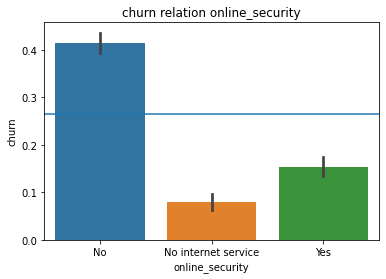

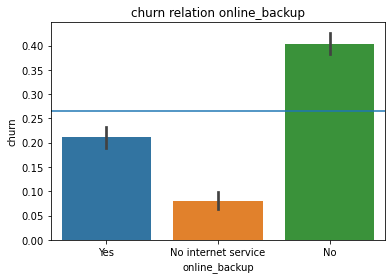

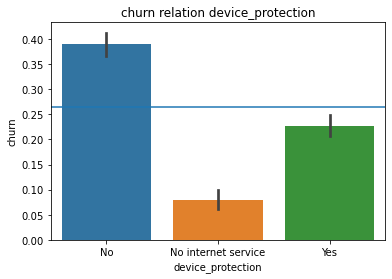

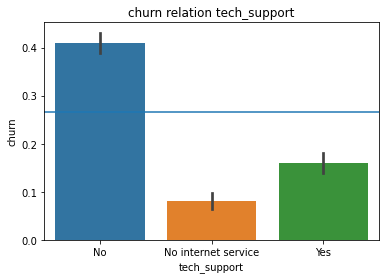

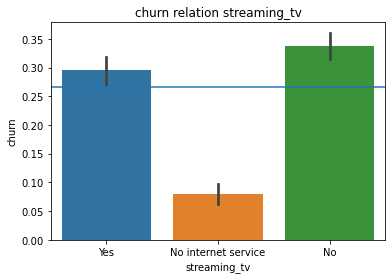

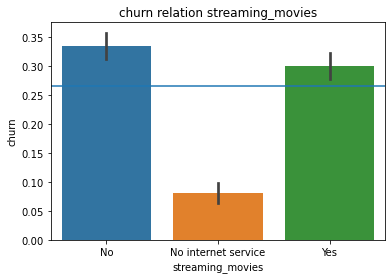

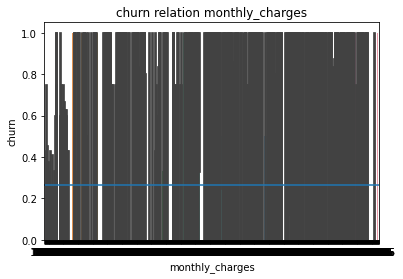

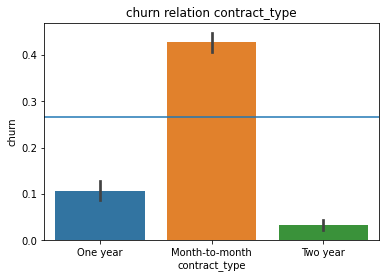

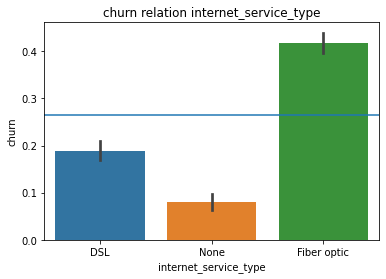

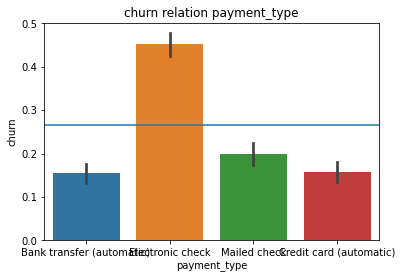

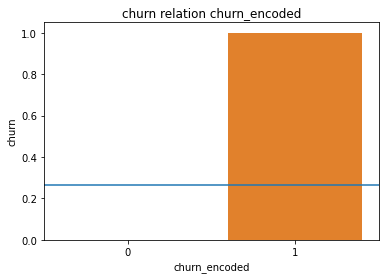

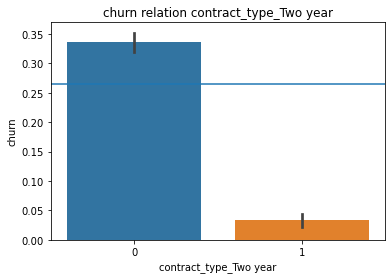

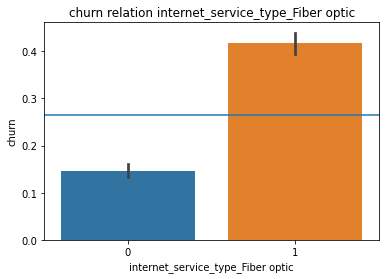

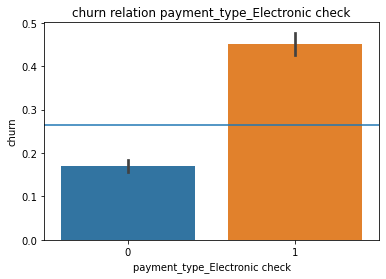

In [287]:
for iter1 in train_cat_df.columns:
    if iter1 != "churn":
        
        var_x = train_cat_df[iter1]
        var_y = train_cat_df.churn
        data = train_cat_df
        threshold_line = train_cat_df.churn.mean()

        plt.title(f"{var_y.name} relation {var_x.name}")
        sns.barplot(x=var_x, y=var_y, data=train_cat_df)
        plt.axhline(threshold_line, label="Threshold line")
        plt.show()

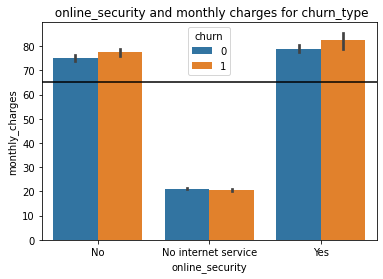

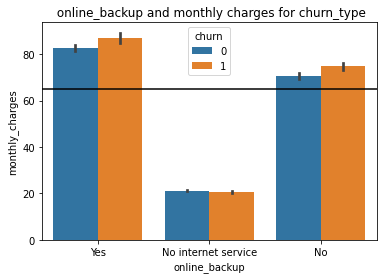

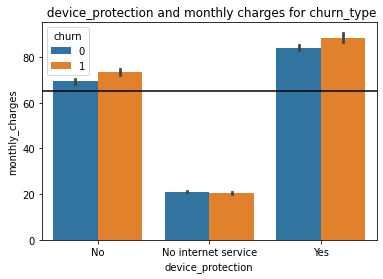

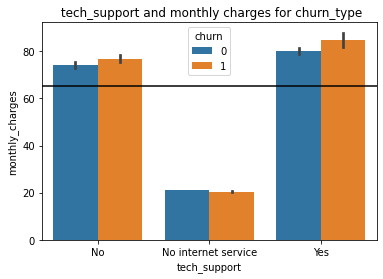

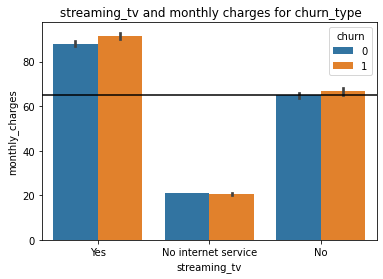

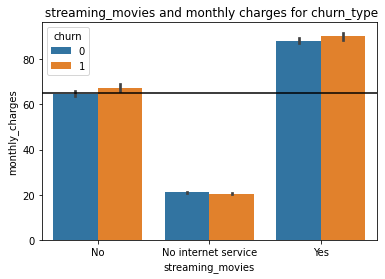

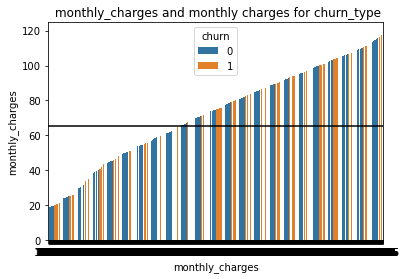

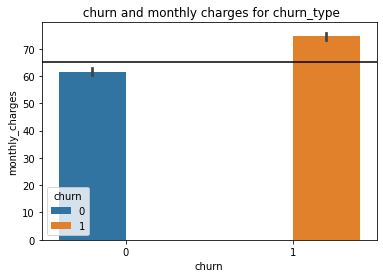

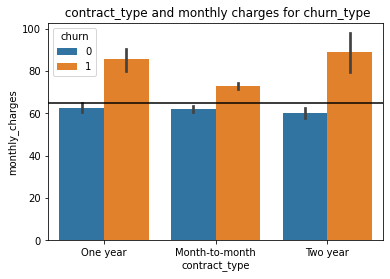

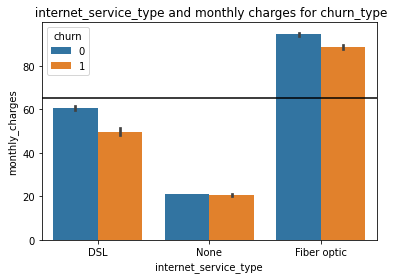

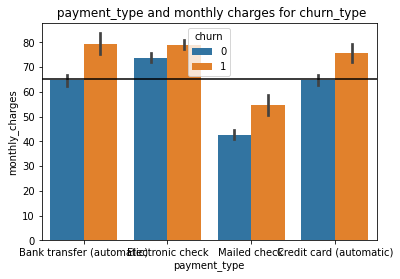

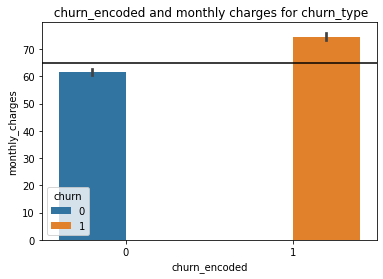

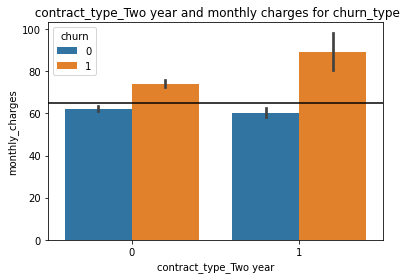

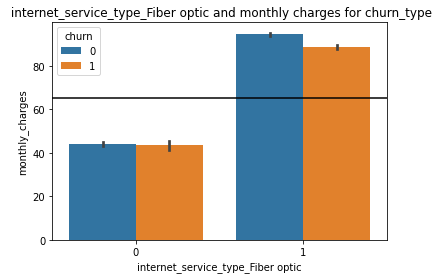

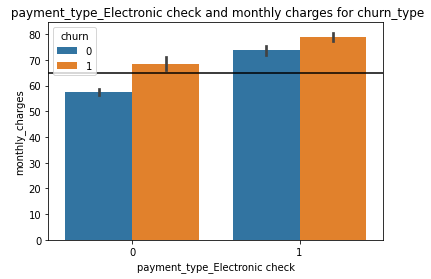

In [288]:
#print(train_df.groupby("churn")[col].value_counts())
for j in train_cat_df.columns:
    sns.barplot(x=train_cat_df[j], y=train_cat_df.monthly_charges, hue=train_cat_df.churn, data=train_cat_df)
    plt.title(f" {train_cat_df[j].name} and monthly charges for churn_type")
    plt.axhline(train_cat_df.monthly_charges.mean(), label="Mean line",color="black")
    plt.show()

In [289]:
train_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,1,0,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,8642-GVWRF,Female,0,Yes,No,2,Yes,No,No,Yes,...,0,0,0,0,0,1,0,0,0,0
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,Yes,...,1,0,0,0,0,0,0,0,1,0
1756,2568-BRGYX,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
2127,3057-VJJQE,Male,0,No,No,35,Yes,Yes,Yes,No,...,0,0,0,0,1,0,0,0,0,1


In [290]:
train_num_df = train_df.drop(columns=train_df.columns.difference(num_vars))
train_num_df


,tenure,monthly_charges,total_charges
5911,26,39.95,1023.75
2479,47,26.90,1250.85
5889,1,50.45,50.45
6087,69,60.05,4176.70
785,51,87.55,4475.90
...,...,...,...
6102,2,79.70,165.00
356,52,50.50,2566.30
1756,4,70.20,237.95
2127,35,55.25,1924.10


In [327]:
train_cat_df.drop(columns=(["monthly_charges"]),inplace=True)
train_mod_df = pd.concat([train_num_df,train_cat_df],axis=1)

train_mod_df.drop(columns=(["churn_encoded",
                            "contract_type_Two year",
                            "internet_service_type_Fiber optic",
                            "payment_type_Electronic check"]),inplace=True)

#train_mod_df = train_mod_df.loc[:,~train_mod_df.columns.duplicated()].copy

train_mod_df.head()

,tenure,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,contract_type,internet_service_type,payment_type
5911,26,39.95,1023.75,No,Yes,No,No,Yes,No,0,One year,DSL,Bank transfer (automatic)
2479,47,26.90,1250.85,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,One year,None,Electronic check
5889,1,50.45,50.45,No,No,Yes,No,No,No,1,Month-to-month,DSL,Mailed check
6087,69,60.05,4176.70,Yes,Yes,No,Yes,Yes,Yes,0,Two year,DSL,Bank transfer (automatic)
785,51,87.55,4475.90,No,No,No,No,Yes,Yes,0,One year,Fiber optic,Credit card (automatic)


In [292]:
churned_df = train_mod_df[train_mod_df.churn == 1]
unchurned_df = train_mod_df[train_mod_df.churn != 1]

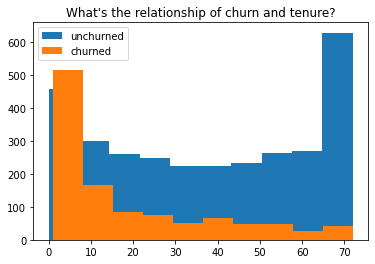

In [293]:
plt.title("What's the relationship of churn and tenure?")

plt.hist(unchurned_df.tenure, label="unchurned")
plt.hist(churned_df.tenure, label="churned")
plt.legend()
plt.show()

people who are new are more likely to leave

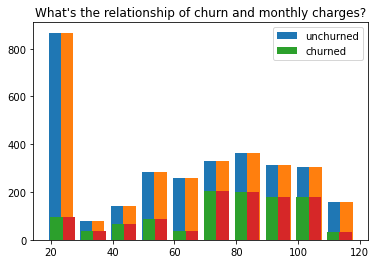

In [294]:
plt.title("What's the relationship of churn and monthly charges?")

plt.hist(unchurned_df.monthly_charges, label="unchurned")
plt.hist(churned_df.monthly_charges, label="churned")
plt.legend()
plt.show()

churn doesn't pick up until it reaches over 70

In [295]:
train_mod_df.head()

,tenure,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,churn,contract_type,internet_service_type,payment_type
5911,26,39.95,1023.75,No,Yes,No,No,Yes,No,39.95,0,One year,DSL,Bank transfer (automatic)
2479,47,26.90,1250.85,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,26.90,0,One year,None,Electronic check
5889,1,50.45,50.45,No,No,Yes,No,No,No,50.45,1,Month-to-month,DSL,Mailed check
6087,69,60.05,4176.70,Yes,Yes,No,Yes,Yes,Yes,60.05,0,Two year,DSL,Bank transfer (automatic)
785,51,87.55,4475.90,No,No,No,No,Yes,Yes,87.55,0,One year,Fiber optic,Credit card (automatic)


In [296]:
train_df.churn.mean()

0.26532544378698225

looks like legacy accounts are more likely to stick around, while newer accounts are more likely to change service

seems like it comes down to if theyre being charged more than the average, they are likely to churn

In [316]:
train_mod_df.monthly_charges.describe()

,monthly_charges,monthly_charges
count,4225.000000,4225.000000
mean,65.056142,65.056142
std,30.268493,30.268493
min,18.250000,18.250000
25%,35.650000,35.650000
50%,70.400000,70.400000
75%,90.150000,90.150000
max,118.750000,118.750000


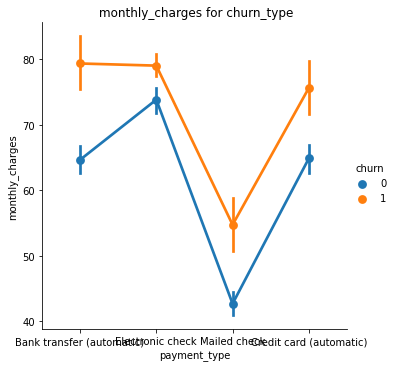

In [330]:
    sns.catplot(y="monthly_charges",x="payment_type",hue="churn", data=train_mod_df, kind="point")
    plt.title(" monthly_charges for churn_type")
    #plt.axhline(train_mod_df["monthly_charges"].mean(), label="Mean line",color="black")
    plt.show()